## Preparation
Preparing the data set 

In [153]:
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_columns', 1500)
# set seed for reproducibility
np.random.seed(123)


import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [154]:
!pip install dill

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Load data

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
data =pd.read_csv('/content/drive/MyDrive/MachineLearning/Labs/Labs/Project1/data/SBA_loans_project_1.zip')

In [157]:
print("Data shape:", data.shape)

Data shape: (809247, 20)


In [158]:
data.dtypes

City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross     object
BalanceGross          object
GrAppv                object
SBA_Appv              object
MIS_Status            object
dtype: object

**Review dataset**

In [159]:
#describe commands give a description of numeric columns only
data.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,809247.000000,809247.000000,809247.000000,809247.000000,809119.000000,809247.000000,809247.000000,809247.000000,809247.000000
mean,53800.937004,398573.783610,110.798776,11.414084,1.280276,8.415866,10.773366,2751.939176,0.757748
std,31186.367109,263354.979813,78.872428,74.529429,0.451692,236.288348,236.612053,12758.411810,0.646347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27577.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55411.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [160]:
data.head(n=10)

,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,6,7,1,1,0,N,"$743,000.00",$0.00,"$743,000.00","$743,000.00",P I F
1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,0,0,1,0,N,N,"$137,000.00",$0.00,"$137,000.00","$109,737.00",P I F
2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,0,0,1,0,0,N,"$280,000.00",$0.00,"$280,000.00","$210,000.00",P I F
3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,0,0,1,1,0,Y,"$144,500.00",$0.00,"$144,500.00","$122,825.00",P I F
4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,0,0,1,0,N,Y,"$52,500.00",$0.00,"$52,500.00","$42,000.00",P I F
5,NEWTOWN,OH,45244,HAMILTON CNTY DEVEL COMPANY IN,OH,234110,240,5,1.0,2,0,1,0,N,N,"$52,000.00",$0.00,"$52,000.00","$52,000.00",P I F
6,MISSION VIEJO,CA,92691,BANK OF AMERICA CALIFORNIA N.A,CA,445310,60,3,1.0,0,0,1,0,Y,N,"$50,000.00",$0.00,"$50,000.00","$25,000.00",P I F
7,OSWEGO,IL,60543,JPMORGAN CHASE BANK NATL ASSOC,IL,812990,57,1,1.0,2,1,0,1,Y,N,"$38,619.00",$0.00,"$25,000.00","$12,500.00",CHGOFF
8,DECATUR,GA,30033,WELLS FARGO BANK NATL ASSOC,SD,561421,71,10,1.0,1,11,1,1,Y,N,"$32,714.00",$0.00,"$20,000.00","$10,000.00",CHGOFF
9,ROLLING HILLS,CA,90274,BANC OF CALIFORNIA NATL ASSOC,CA,541512,84,4,1.0,4,4,1,1,Y,N,"$90,055.00",$0.00,"$50,000.00","$25,000.00",P I F


## Dataset preparation and clean-up

Modify and clean-up the dataset as following:
- Replace encode Na/Null values
- Convert the strings styled as '$XXXX.XX' to float values. Columns = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
- Convert MIS_Status to 0/1. Make value "CHGOFF" as 1

In [161]:
# colomn type
data.dtypes

City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
DisbursementGross     object
BalanceGross          object
GrAppv                object
SBA_Appv              object
MIS_Status            object
dtype: object

In [162]:
data['MIS_Status']=data['MIS_Status'].replace({'CHGOFF':1,'P I F':0}).astype(float)

In [163]:
data['DisbursementGross']=data['DisbursementGross'].replace({'\$':'',',':''},regex=True).astype(float)
data['GrAppv']=data['GrAppv'].replace({'\$':'',',':''},regex=True).astype(float)
data['SBA_Appv']=data['SBA_Appv'].replace({'\$':'',',':''},regex=True).astype(float)

In [164]:
data['BalanceGross']=data['BalanceGross'].replace({'\$':'',',':''},regex=True).astype(float)

In [165]:
values_to_fill={}
for col in data.drop(columns=['MIS_Status']).columns:
  if data[col].dtype=='object':
    values_to_fill[col]='Missing'
  else:
    values_to_fill[col]=0
data.fillna(value=values_to_fill,inplace=True)

In [166]:
data.isnull().any()

City                 False
State                False
Zip                  False
Bank                 False
BankState            False
NAICS                False
Term                 False
NoEmp                False
NewExist             False
CreateJob            False
RetainedJob          False
FranchiseCode        False
UrbanRural           False
RevLineCr            False
LowDoc               False
DisbursementGross    False
BalanceGross         False
GrAppv               False
SBA_Appv             False
MIS_Status            True
dtype: bool

In [167]:
data.isnull().sum()

City                    0
State                   0
Zip                     0
Bank                    0
BankState               0
NAICS                   0
Term                    0
NoEmp                   0
NewExist                0
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status           1822
dtype: int64

In [168]:
#only target column has null values and this data has use for us so will drop rows where target column has null values
data.dropna(inplace=True)

In [169]:
# list columns with missing values
sum(data.isnull().any())

0

In [170]:
# wheather the bank and customer are in the same state
data['bank_customer_state']=np.where(data['BankState']==data['State'],1,0)
# The difference between approved bank loan amount and sba secured loan amount 
data['non_secured_loan'] = data['DisbursementGross'] - data['SBA_Appv']

I want to check 
1)the distribution of non secured loan amount in defaulted and non defaulted loans

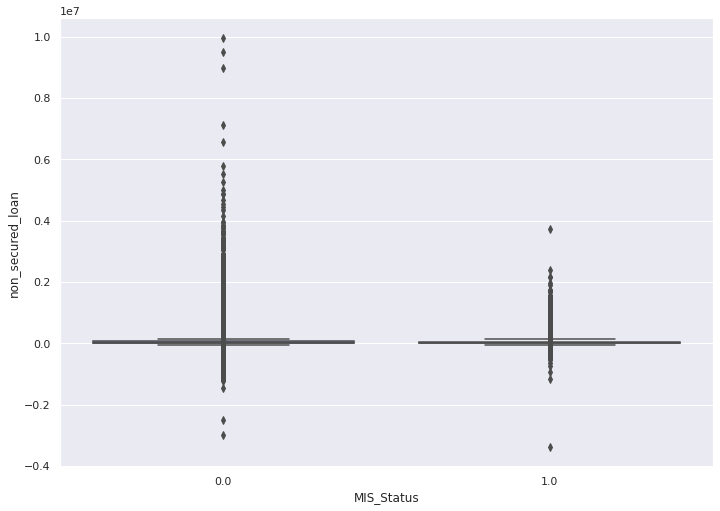

In [171]:
import seaborn as sns
sns.boxplot(x="MIS_Status",y="non_secured_loan",data=data)
#defaulted loan and non defaulted laon has same type same mean and quartiles they just differ in outlier

In [172]:
data.groupby("MIS_Status")['MIS_Status'].count()

MIS_Status
0.0    665576
1.0    141849
Name: MIS_Status, dtype: int64

In [173]:
print(data.groupby("MIS_Status")["MIS_Status"].count()*100/data["MIS_Status"].count())

MIS_Status
0.0    82.431929
1.0    17.568071
Name: MIS_Status, dtype: float64


In [174]:
#defaulters in lowdoc
print(data.LowDoc.unique())
n = pd.unique(data['LowDoc'])
d=dict()
for i in data.LowDoc:
  if i in d.keys():
    d[i]+=1
  else:
    d[i]=1
print
print(d)
for i in d.keys():
  d[i]=d[i]*100/(data.shape[0])
print(d)
#Majority of loan applications has 'Y' or 'N' category other variables are very less in number can be entering error or very few special application cases

['N' 'Y' 'A' 'Missing' 'R' '0' 'S' 'C' '1']
{'N': 702853, 'Y': 99186, 'A': 447, 'Missing': 2315, 'R': 65, '0': 1343, 'S': 534, 'C': 681, '1': 1}
{'N': 87.04870421401368, 'Y': 12.284236926030282, 'A': 0.055361179056878346, 'Missing': 0.28671393627891134, 'R': 0.008050283308047187, '0': 0.16633123819549803, 'S': 0.06613617363841844, 'C': 0.08434219896584823, '1': 0.0001238505124314952}


I want to check if my default rate more in lowdoc applications and how the loan amount of defaulted cases vary in lowdoc and non lowdoc applications

In [175]:
df_lowdoc=data[data['LowDoc']=='Y']
df_lowdoc_d=df_lowdoc[df_lowdoc['MIS_Status']==1]
df_lowdoc_Nd=df_lowdoc[df_lowdoc['MIS_Status']==0]
print(f'percentage of defauled cases in low doc applications {df_lowdoc_d.shape[0]*100/df_lowdoc.shape[0]}')
print(f'No of defaulted cases in lowdoc cases {df_lowdoc_d.shape[0]}')
print(f'percentage of non defauled cases in low doc applications {df_lowdoc_Nd.shape[0]*100/df_lowdoc.shape[0]}')
print(f'no of non defauled cases in low doc applications {df_lowdoc_Nd.shape[0]}')

percentage of defauled cases in low doc applications 9.051680680741233
No of defaulted cases in lowdoc cases 8978
percentage of non defauled cases in low doc applications 90.94831931925877
no of non defauled cases in low doc applications 90208


In [176]:
df_lowdoc=data[data['LowDoc']=='N']
df_lowdoc_d=df_lowdoc[df_lowdoc['MIS_Status']==1]
df_lowdoc_Nd=df_lowdoc[df_lowdoc['MIS_Status']==0]
print(f'percentage of defauled cases in non low doc applications {df_lowdoc_d.shape[0]*100/df_lowdoc.shape[0]}')
print(f'number of defauled cases in non low doc applications {df_lowdoc_d.shape[0]}')
print(f'percentage of non defauled cases in non low doc applications {df_lowdoc_Nd.shape[0]*100/df_lowdoc.shape[0]}')
print(f'non of defauled cases in non low doc applications {df_lowdoc_Nd.shape[0]}')
#Non low doc applications have higher percentage of defaulted cases

percentage of defauled cases in non low doc applications 18.702772841547237
number of defauled cases in non low doc applications 131453
percentage of non defauled cases in non low doc applications 81.29722715845276
non of defauled cases in non low doc applications 571400


Now I want to check the average sba sanctioned loan in lowdoc and non lowdoc laons and then in defaulted and non defaulted cases
I will also check if that difference is statistically significant

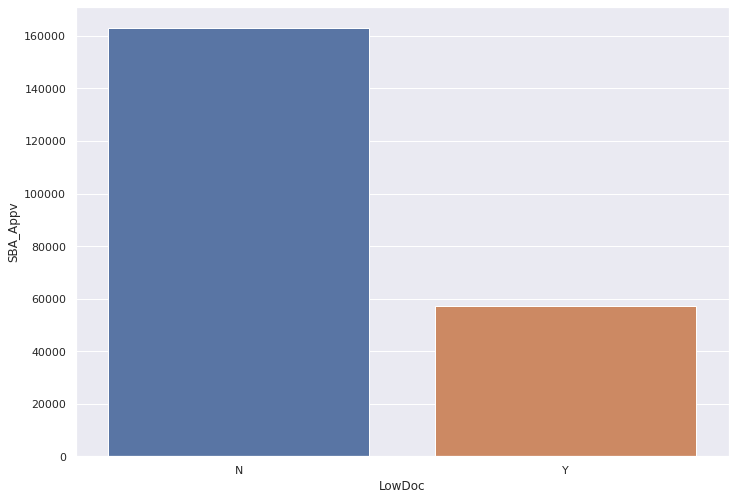

In [177]:
data1=data[(data['LowDoc']=='Y') | (data['LowDoc']=='N')]
df1=data1.groupby(['LowDoc'])['SBA_Appv'].mean()
df1=df1.reset_index()
sns.barplot(x='LowDoc',y='SBA_Appv',data=df1)
#we see that average loan amount that was approved in lowdoc is much less than that was approved with all documents

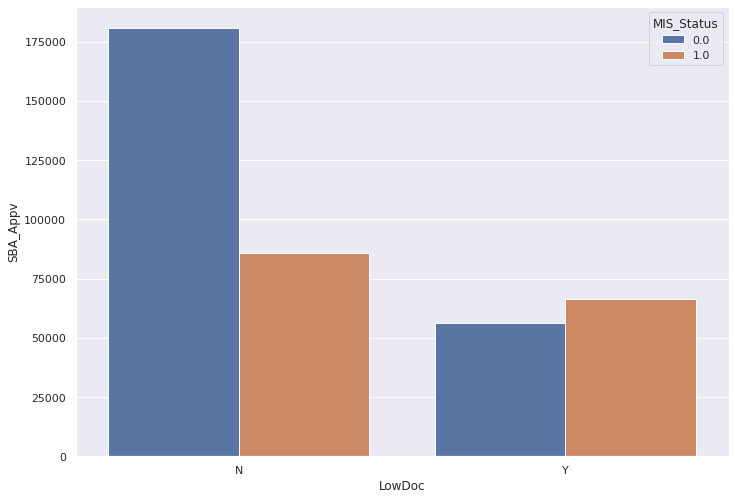

In [178]:
data2=data1.groupby(['LowDoc','MIS_Status'])['SBA_Appv'].mean()
data2=data2.reset_index()
sns.barplot(x='LowDoc',y='SBA_Appv',hue='MIS_Status',data=data2)
#this mean amount is same in low doc application but differ greatly in non low doc applications

Now I want to check if is difference is statiscally significant

In [179]:
print(np.var(data1[data1['LowDoc']=='N']['SBA_Appv'])/np.var(data1[data1['LowDoc']=='Y']['SBA_Appv']))
#unequal variance

59.686564267740444


In [180]:
from scipy.stats import ttest_ind
ttest_ind(data1[data1['LowDoc']=='Y']['SBA_Appv'],data1[data1['LowDoc']=='N']['SBA_Appv'],equal_var=False)
#it is statistically different

Ttest_indResult(statistic=-347.5385182601668, pvalue=0.0)

In [181]:
data2=data1[data1['LowDoc']=='N']
print(np.var(data2[data2['MIS_Status']==0]['SBA_Appv'])/np.var(data2[data2['MIS_Status']==1]['SBA_Appv']))

2.4454706688951515


In [182]:
ttest_ind(data2[data2['MIS_Status']==0]['SBA_Appv'],data2[data2['MIS_Status']==1]['SBA_Appv'],alternative='greater')
#they are statistically significant

Ttest_indResult(statistic=130.26085446668372, pvalue=0.0)

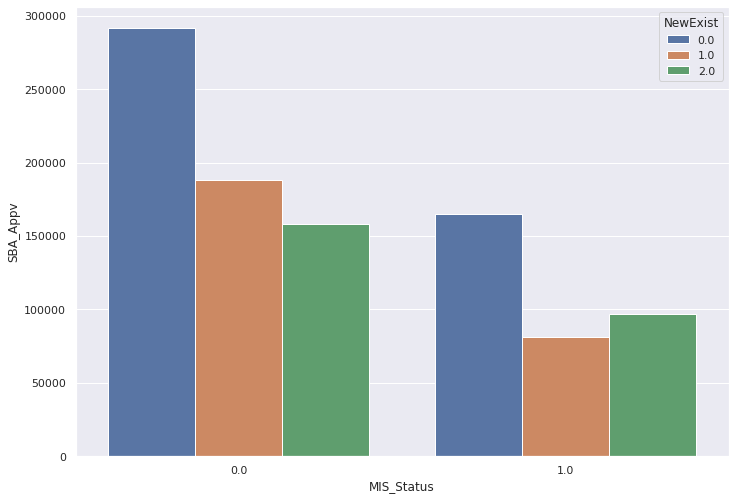

In [183]:
data5=data2.groupby(['MIS_Status','NewExist'])['SBA_Appv'].mean()
data5=data5.reset_index()
sns.barplot(x='MIS_Status',y='SBA_Appv',hue='NewExist',data=data5)
#average loan amount is almost same for both existing and non existing in both default and non default

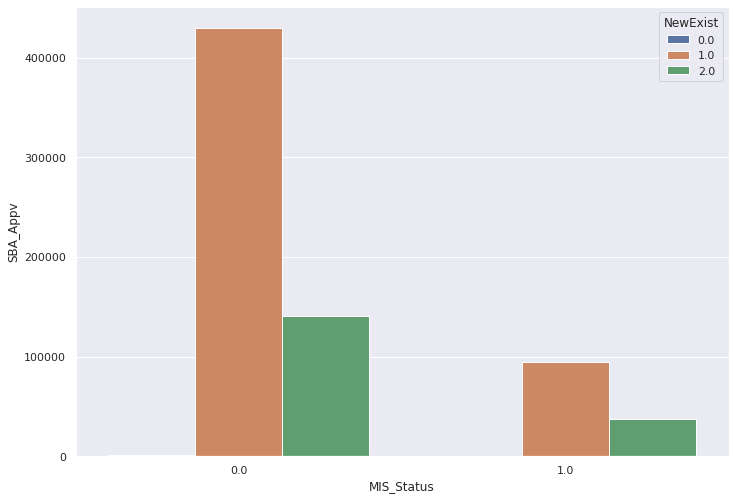

In [184]:
data5=data2.groupby(['MIS_Status','NewExist'])['SBA_Appv'].count()
data5=data5.reset_index()
sns.barplot(x='MIS_Status',y='SBA_Appv',hue='NewExist',data=data5)
# In both categories more no of applications are for new firms

In [185]:
data3=data1[data1['LowDoc']=='Y']
print(np.var(data3[data3['MIS_Status']==1]['SBA_Appv'])/np.var(data3[data3['MIS_Status']==0]['SBA_Appv']))

1.1710180058583648


In [186]:
data.NewExist.unique()
#here 0 represent missing value

array([1., 2., 0.])

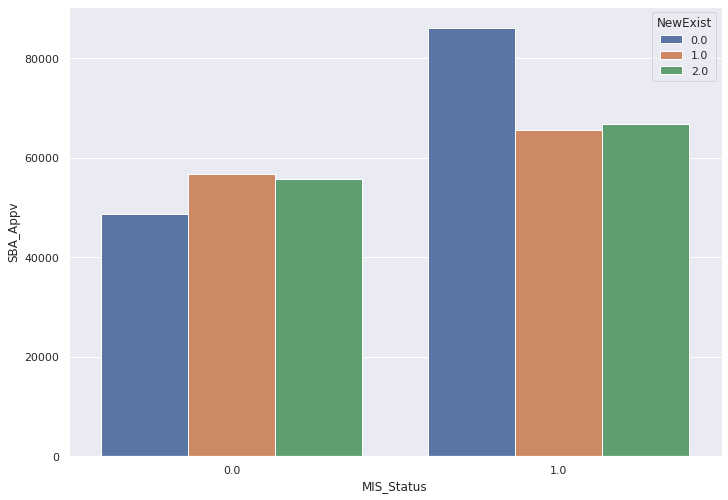

In [187]:
data4=data3.groupby(['MIS_Status','NewExist'])['SBA_Appv'].mean()
data4=data4.reset_index()
sns.barplot(x='MIS_Status',y='SBA_Appv',hue='NewExist',data=data4)
#No difference in average loan I want to see count of numbers

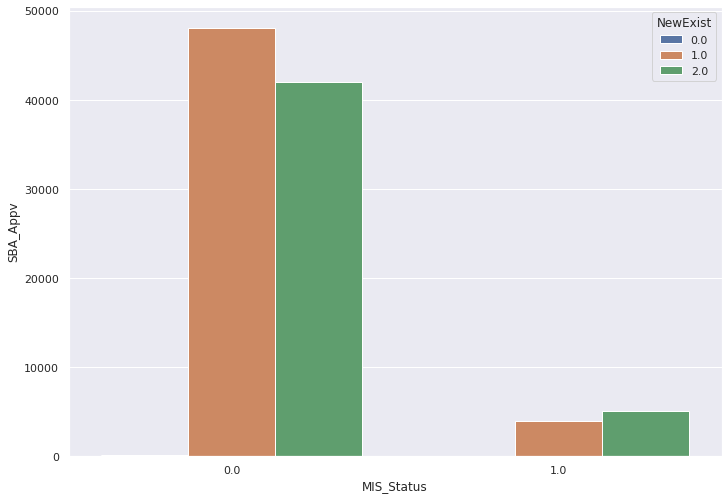

In [188]:
data4=data3.groupby(['MIS_Status','NewExist'])['SBA_Appv'].count()
data4=data4.reset_index()
sns.barplot(x='MIS_Status',y='SBA_Appv',hue='NewExist',data=data4)
#count is also same so we cannot decide on basis if the new or not for lowdoc application

In [189]:
ttest_ind(data3[data3['MIS_Status']==0]['SBA_Appv'],data3[data3['MIS_Status']==1]['SBA_Appv'],alternative='less')
#so non defaulter mean loan amount is less in lowdoc loan

Ttest_indResult(statistic=-29.17476604218757, pvalue=1.2509833149854287e-186)

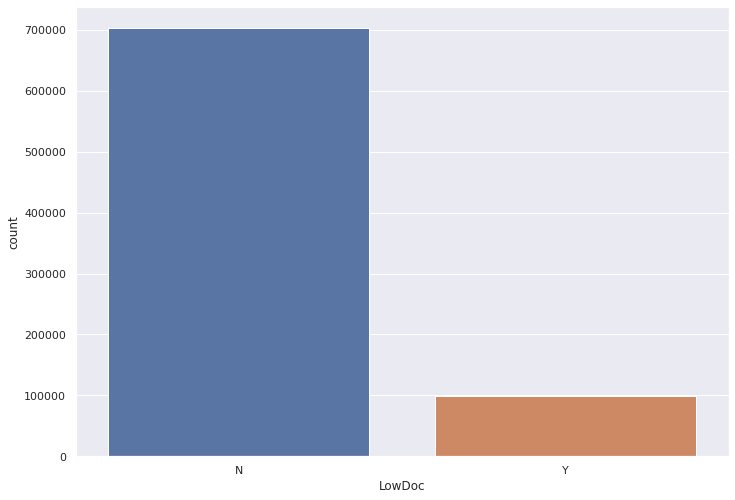

In [190]:
sns.countplot(data1['LowDoc'])
# majority of loan application were in non lowdoc cate

In [191]:
data1.isna().sum()

City                   0
State                  0
Zip                    0
Bank                   0
BankState              0
NAICS                  0
Term                   0
NoEmp                  0
NewExist               0
CreateJob              0
RetainedJob            0
FranchiseCode          0
UrbanRural             0
RevLineCr              0
LowDoc                 0
DisbursementGross      0
BalanceGross           0
GrAppv                 0
SBA_Appv               0
MIS_Status             0
bank_customer_state    0
non_secured_loan       0
dtype: int64

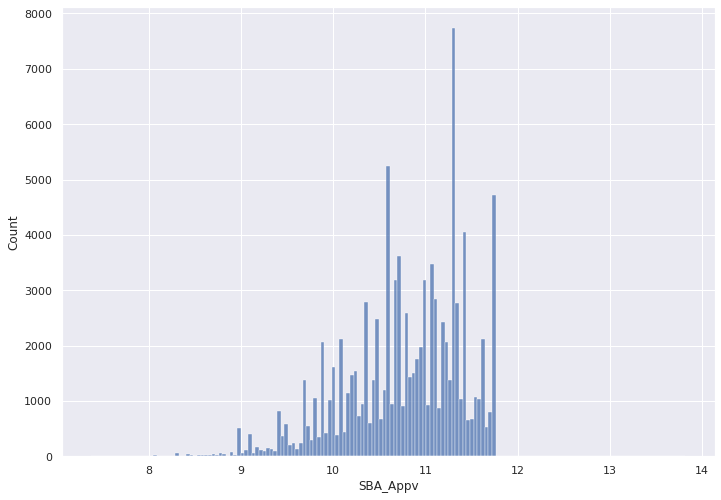

In [192]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(data=data1[data1['LowDoc']=='Y'],x=np.log(data1[data1['LowDoc']=='Y'].SBA_Appv))

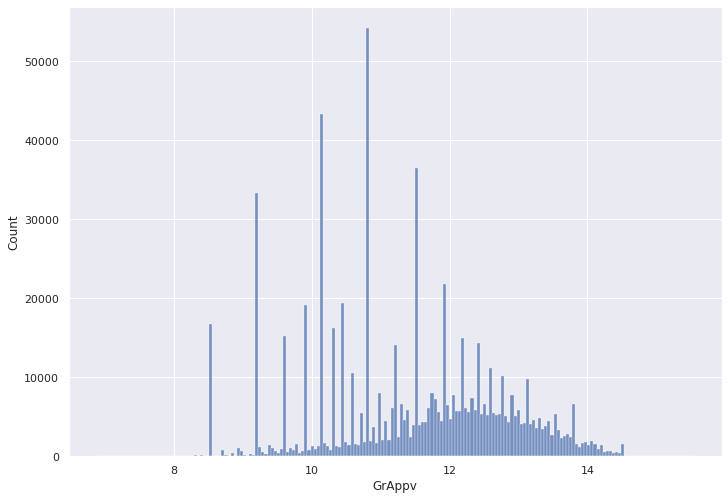

In [193]:
sns.histplot(data=data1[data1['LowDoc']=='N'],x=np.log(data1[data1['LowDoc']=='N'].GrAppv))

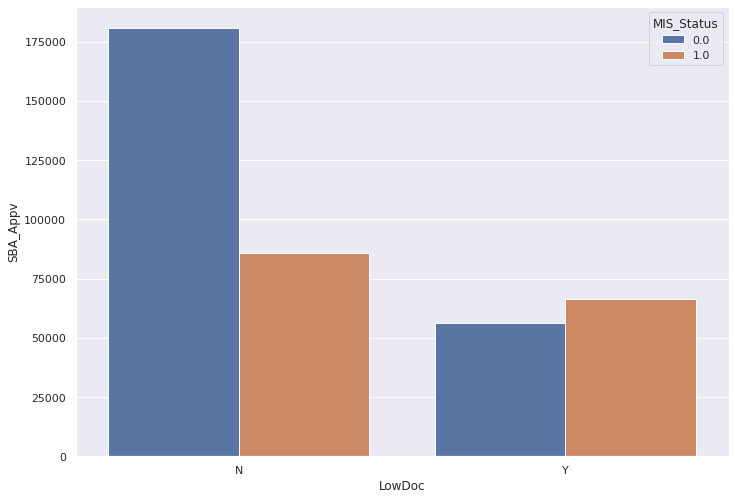

In [194]:
df1=data1.groupby(['MIS_Status','LowDoc'])['SBA_Appv'].mean()
df1=df1.reset_index()
sns.barplot(x='LowDoc',y='SBA_Appv',hue='MIS_Status',data=df1)

In [195]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [196]:
train.shape , test.shape

((565197, 22), (242228, 22))

## Categorical variables encoding

In [229]:
X_tr = train.drop(columns='MIS_Status')
y_tr = train['MIS_Status']
X_ts = test.drop(columns='MIS_Status')
y_ts = test['MIS_Status']

In [198]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [231]:
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from copy import deepcopy

'''Save original columns that need to be droped or not used
   Save One-hot and Label encoders for future use
'''
#Columns to drop from ML models
cols_to_drop = []
#Categorical encoders disctionary
cat_encoders = {}
#New categorical (encoded) columns
cat_enc_columns = []

for col in X_tr.columns:
  if X_tr[col].dtype == 'object':
    if X_tr[col].nunique() < 10:
        print("One-hot encoding of ", col)
        enc = OneHotEncoder( handle_unknown='ignore', sparse=False)
        enc.fit(X_tr[[col]])
        result = enc.transform(X_tr[[col]])
        ohe_columns = [col+"_"+str(x) for x in enc.categories_[0]]
        cat_enc_columns = cat_enc_columns + ohe_columns
        result_train = pd.DataFrame(result, columns=ohe_columns , index=X_train.index)
        X_train = pd.concat([X_tr, result_train.reindex(X_train.index)], axis=1 , join='inner')
        '''Encode Testing'''
        result = enc.transform(X_ts[[col]])
        result_test = pd.DataFrame(result, columns=ohe_columns , index=X_test.index)
        X_test = pd.concat([X_ts, result_test.reindex(X_ts.index)], axis=1 , join='inner')
        cat_encoders[col] = [deepcopy(enc),"ohe"]
    else:
        print("Target Encoding of ", col)
        enc = TargetEncoder()
        enc.fit(X_tr[col] , y = y_tr , handle_unknown='value' )
        pickle.dump(enc, open(col+'_trg_'+'pre_processing.p', "wb"))
        new_col_name = col+"_trg"
        X_tr[new_col_name] = enc.transform(X_tr[[col]])
        X_ts[new_col_name] = enc.transform(X_ts[[col]])
        cat_encoders[col] = [deepcopy(enc),"trg"]
        cat_enc_columns.append(new_col_name)


    cols_to_drop.append(col)

Target Encoding of  City
Target Encoding of  State
Target Encoding of  Bank
Target Encoding of  BankState
Target Encoding of  RevLineCr
One-hot encoding of  LowDoc


In [232]:
sum(X_tr.isna().sum()) , sum(X_ts.isna().sum())

(0, 0)

In [233]:
X_tr.shape , X_ts.shape

((565197, 26), (242228, 26))

In [234]:
from sklearn.preprocessing import MinMaxScaler
num_scalers = {}
'''Scale only original columns'''
for col in X_tr.columns[0:23]:
    if X_tr[col].dtype != 'object':
        print("MinMax scale of ", col)
        scaler = MinMaxScaler()
        scaler.fit(X_tr[[col]])
        pickle.dump(scaler, open(col+'_sc_'+'pre_processing.p', "wb"))
        X_tr[col+"_sc"] = scaler.transform(X_tr[[col]])
        X_ts[col+"_sc"] = scaler.transform(X_ts[[col]])

        num_scalers[col] = [deepcopy(scaler),"MinMax"]
        cols_to_drop.append(col)

MinMax scale of  Zip
MinMax scale of  NAICS
MinMax scale of  Term
MinMax scale of  NoEmp
MinMax scale of  NewExist
MinMax scale of  CreateJob
MinMax scale of  RetainedJob
MinMax scale of  FranchiseCode
MinMax scale of  UrbanRural
MinMax scale of  DisbursementGross
MinMax scale of  BalanceGross
MinMax scale of  GrAppv
MinMax scale of  SBA_Appv
MinMax scale of  bank_customer_state
MinMax scale of  non_secured_loan
MinMax scale of  City_trg
MinMax scale of  State_trg


In [235]:
X_tr.drop(columns=cols_to_drop,axis=1,inplace=True)
X_ts.drop(columns=cols_to_drop,axis=1,inplace=True)

In [236]:
X_tr.shape , X_ts.shape

((565197, 20), (242228, 20))

# Model Training

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [238]:
%%time
logreg = LogisticRegression(C=1.0 , max_iter=100,  n_jobs= -1,
                            penalty= 'elasticnet' , l1_ratio=0.5,
                            solver= 'saga')
logreg.fit(X_tr, y_tr)
# print logreg accuracy score, confusion matrix and auc score
print("Logistic Regression Accuracy Score: ", logreg.score(X_tr, y_tr))
print("Logistic Regression Accuracy Score: ", logreg.score(X_ts, y_ts))
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_tr, logreg.predict(X_tr))/X_tr.shape[0])
print("Logistic Regression Confusion Matrix: \n", confusion_matrix(y_ts, logreg.predict(X_ts))/X_ts.shape[0])
print("Logistic Regression AUC Score: ", roc_auc_score(y_tr, logreg.predict_proba(X_tr)[:,1]))
print("Logistic Regression AUC Score: ", roc_auc_score(y_ts, logreg.predict_proba(X_ts)[:,1]))

Logistic Regression Accuracy Score:  0.868481255208361
Logistic Regression Accuracy Score:  0.8634674769225689
Logistic Regression Confusion Matrix: 
 [[0.80250603 0.02194102]
 [0.10957772 0.06597523]]
Logistic Regression Confusion Matrix: 
 [[0.80094787 0.0230733 ]
 [0.11345922 0.06251961]]
Logistic Regression AUC Score:  0.8581267925493659
Logistic Regression AUC Score:  0.8485591186678667
CPU times: user 20.9 s, sys: 309 ms, total: 21.2 s
Wall time: 25.6 s


In [239]:
from sklearn.tree import DecisionTreeClassifier

In [240]:
%%time
dtree = DecisionTreeClassifier(max_depth=6)
dtree.fit(X_tr, y_tr)
# print dtree accuracy score, confusion matrix and auc score
print("Decision Tree Accuracy Score: ", dtree.score(X_tr, y_tr))
print("Decision Tree Accuracy Score: ", dtree.score(X_ts, y_ts))
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_tr, dtree.predict(X_tr))/X_tr.shape[0])
print("Decision Tree Confusion Matrix: \n", confusion_matrix(y_ts, dtree.predict(X_ts))/X_ts.shape[0])
print("Decision Tree AUC Score: ", roc_auc_score(y_tr, dtree.predict_proba(X_tr)[:,1]))
print("Decision Tree AUC Score: ", roc_auc_score(y_ts, dtree.predict_proba(X_ts)[:,1]))

Decision Tree Accuracy Score:  0.9120129795451851
Decision Tree Accuracy Score:  0.9080370559968294
Decision Tree Confusion Matrix: 
 [[0.79303146 0.03141559]
 [0.05657143 0.11898152]]
Decision Tree Confusion Matrix: 
 [[0.79158066 0.03244051]
 [0.05952243 0.1164564 ]]
Decision Tree AUC Score:  0.9343388930653271
Decision Tree AUC Score:  0.9321157330616667
CPU times: user 3.84 s, sys: 21.2 ms, total: 3.86 s
Wall time: 3.85 s


In [211]:
from sklearn.model_selection import GridSearchCV

In [241]:
%%time
model = LogisticRegression()
param_grid = {'C': [0.001, 0.1 , 1], 'penalty': ['l1', 'l2' , 'elasticnet']}
grid_search = GridSearchCV(model, param_grid, scoring= 'roc_auc' , cv=3, n_jobs=-1)
grid_search.fit(X_tr, y_tr)
#scores
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.score(X_ts, y_ts)

{'C': 1, 'penalty': 'l2'}
0.8577811499005478
CPU times: user 6.92 s, sys: 2.71 s, total: 9.63 s
Wall time: 22.5 s


0.848472104339536

In [242]:
%%time
model = DecisionTreeClassifier()
param_grid = {'max_depth': [ 4, 6, 8, 10, 12, 15,  20]}
grid_search = GridSearchCV(model, param_grid, scoring= 'roc_auc' , cv=3, n_jobs=-1)
grid_search.fit(X_tr, y_tr)
#scores
print(grid_search.best_params_)
print(grid_search.best_score_)
grid_search.score(X_ts, y_ts)

{'max_depth': 10}
0.9619607009944416
CPU times: user 5.78 s, sys: 121 ms, total: 5.9 s
Wall time: 1min 13s


0.9626302550511348

## Model Tuning

In [243]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import randint

In [244]:
%%time
model = DecisionTreeClassifier()
space = {}
space['max_depth'] =  randint(1, 40)
space['min_samples_split'] = randint(2, 100)
space['min_samples_leaf'] = randint(1, 1000)
space['criterion'] = ['gini', 'entropy']
space['class_weight'] = [None, 'balanced']
space['splitter'] = ['best', 'random']

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=2)
rand_search = RandomizedSearchCV(model, space , n_iter= 100 , scoring= 'roc_auc', n_jobs=-1, cv=cv)

# execute search
result = rand_search.fit(X_tr, y_tr)
# summarize result
print('Best Score on Train: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
print('Best Score on Test: %s' % rand_search.score(X_ts, y_ts))

Best Score on Train: 0.9690844264920595
Best Hyperparameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 102, 'min_samples_split': 35, 'splitter': 'best'}
Best Score on Test: 0.9685306043792757
CPU times: user 9.64 s, sys: 834 ms, total: 10.5 s
Wall time: 8min 28s
